In [1]:
import os

import numpy as np
import pandas as pd

from datablocks.datablock import DBX, DATABLOCKS_HOMELAKE as HOMELAKE
from micron.datablocks import miRCoHN, miRNA, miRCoSeqs, ZSCC, FastText

# DBXs

## counts

In [2]:
mircohn = DBX(miRCoHN, 'mirco_hn').Datablock(verbose=True)
_mircohn = DBX(miRCoHN, 'mirco_hn', dataspace=HOMELAKE).Datablock(verbose=True)

## seqs

In [3]:
mirna = DBX(miRNA, 'mirna').Datablock(verbose=True).SCOPE()
_mirna = DBX(miRNA, 'mirna', dataspace=HOMELAKE).Datablock(verbose=True).SCOPE()

## counts + seqs

In [4]:
MIR_COSEQS_SEQS_PER_RECORD = 300
MIR_COSEQS_NPASSES = 1000
mircoseqshn = \
    DBX(miRCoSeqs, f"mircoseqshn_{MIR_COSEQS_NPASSES}_{MIR_COSEQS_SEQS_PER_RECORD}")\
        .Datablock(verbose=True)\
            .SCOPE(logcounts=mircohn.READ('logcounts'), 
                   logcontrols=mircohn.READ('logcontrols'),
                       seqs=mirna.READ(), 
                       npasses=MIR_COSEQS_NPASSES, 
                       nseqs_per_record=MIR_COSEQS_SEQS_PER_RECORD)
_mircoseqshn = \
    DBX(miRCoSeqs, f"mircoseqshn_{MIR_COSEQS_NPASSES}_{MIR_COSEQS_SEQS_PER_RECORD}", dataspace=HOMELAKE, pic=True)\
        .Datablock(verbose=True)\
            .SCOPE(logcounts=_mircohn.READ('logcounts'), 
                   logcontrols=_mircohn.READ('logcontrols'),
                       seqs=_mirna.READ(), 
                       npasses=MIR_COSEQS_NPASSES, 
                       nseqs_per_record=MIR_COSEQS_SEQS_PER_RECORD)

In [54]:
MIR_COSEQS_SEQS_PER_RECORD = 300
MIR_COSEQS_NPASSES = 1000
mircoseqshn0 = \
    DBX(miRCoSeqs, f"mircoseqshn_1_{MIR_COSEQS_SEQS_PER_RECORD}")\
        .Datablock(verbose=True)\
            .SCOPE(logcounts=mircohn.READ('logcounts'), 
                   logcontrols=mircohn.READ('logcontrols'),
                       seqs=mirna.READ(), 
                       npasses=1, 
                       nseqs_per_record=MIR_COSEQS_SEQS_PER_RECORD)
_mircoseqshn0 = \
    DBX(miRCoSeqs, f"mircoseqshn_1_{MIR_COSEQS_SEQS_PER_RECORD}", dataspace=HOMELAKE, pic=True)\
        .Datablock(verbose=True)\
            .SCOPE(logcounts=_mircohn.READ('logcounts'), 
                   logcontrols=_mircohn.READ('logcontrols'),
                       seqs=_mirna.READ(), 
                       npasses=1, 
                       nseqs_per_record=MIR_COSEQS_SEQS_PER_RECORD)

## clustering

In [6]:
logcounts_zscc = DBX(ZSCC, 'zscc_mircohn').Datablock(verbose=True).SCOPE(data_frame=mircohn.READ('logcounts'), fillna=0.0)
_logcounts_zscc = DBX(ZSCC, 'zscc_mircohn', dataspace=HOMELAKE).Datablock(verbose=True).SCOPE(data_frame=_mircohn.READ('logcounts'), fillna=0.0)

In [7]:
jlogcounts_zscc = DBX(ZSCC, 'zscc_mircoseqshnlog').Datablock(verbose=True).SCOPE(data_frame=mircoseqshn.READ('logcounts'), fillna=0.0)
_jlogcounts_zscc = DBX(ZSCC, 'zscc_mircoseqshnlog', dataspace=HOMELAKE).Datablock(verbose=True).SCOPE(data_frame=_mircoseqshn.READ('logcounts'), fillna=0.0)

In [8]:
jcounts_zscc = DBX(ZSCC, 'mircoseqhnco').Datablock(verbose=True).SCOPE(data_frame=mircoseqshn.READ('counts'), fillna=0.0)
_jcounts_zscc = DBX(ZSCC, 'mircoseqhnco', dataspace=HOMELAKE).Datablock(verbose=True).SCOPE(data_frame=_mircoseqshn.READ('counts'), fillna=0.0)

### fasttext

* cbow: train

In [9]:
CBOW_DIM = 100
CBOW_CONTEXT_WINDOW_SIZE = MIR_COSEQS_SEQS_PER_RECORD
mircoseqscbow = DBX(FastText, "microseqscbow")\
    .SCOPE(samples_path=mircoseqshn.PATH('samples'), 
             model='cbow', 
             dim=CBOW_DIM, 
             context_window_size=CBOW_CONTEXT_WINDOW_SIZE)
_mircoseqscbow = DBX(FastText, "microseqscbow", dataspace=HOMELAKE, pic=True)\
    .SCOPE(samples_path=_mircoseqshn.PATH('samples'), 
             model='cbow', 
             dim=CBOW_DIM, 
             context_window_size=CBOW_CONTEXT_WINDOW_SIZE)

# transcribe

In [59]:
print(DBX.transcribe(_mircohn, 
                     _mirna, 
                     _mircoseqshn,
                     _mircoseqshn0,
                     _logcounts_zscc,
                     _jlogcounts_zscc,
                     _jcounts_zscc,
                     _mircoseqscbow,
                    with_env=['HOME']))

import os
import fsspec
import micron.datablocks


HOME = os.getenv('HOME')


# 'DBX.micron.datablocks.miRCoHN@mirco_hn'
mirco_hn_roots = {
	'logcounts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/logcounts',
	'pivots': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/pivots',
	'logcontrols': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/logcontrols',
	'downregulated_mirna_infixes': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/downregulated_mirna_infixes',
}
mirco_hn = micron.datablocks.miRCoHN(verbose=True, debug=False, rm_tmp=True)

# 'DBX.micron.datablocks.miRNA@mirna'
mirna_roots = f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRNA/version=0.2.1'
mirna = micron.datablocks.miRNA(verbose=True, debug=False, rm_tmp=True)

# 'DBX.micron.datablocks.miRCoSeqs@mircoseqshn_1000_300'
mircoseqshn_1000_300_scope = {'logcounts': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts', 'logcontro

In [60]:
import os
import fsspec
import micron.datablocks


HOME = os.getenv('HOME')


# 'DBX.micron.datablocks.miRCoHN@mirco_hn'
mirco_hn_roots = {
	'logcounts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/logcounts',
	'pivots': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/pivots',
	'logcontrols': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/logcontrols',
	'downregulated_mirna_infixes': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/downregulated_mirna_infixes',
}
mirco_hn = micron.datablocks.miRCoHN(verbose=True, debug=False, rm_tmp=True)

# 'DBX.micron.datablocks.miRNA@mirna'
mirna_roots = f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRNA/version=0.2.1'
mirna = micron.datablocks.miRNA(verbose=True, debug=False, rm_tmp=True)

# 'DBX.micron.datablocks.miRCoSeqs@mircoseqshn_1000_300'
mircoseqshn_1000_300_scope = {'logcounts': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts', 'logcontrols': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols', 'seqs': 'DBX.micron.datablocks.miRNA@0.2.1#mirna:', 'npasses': 1000, 'nseqs_per_record': 300}
mircoseqshn_1000_300_roots = {
	'logcounts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcounts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'counts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/counts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'logcontrols': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcontrols/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'seqs': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/seqs/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'samples': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/samples/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'rec_sample_ranges': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/rec_sample_ranges/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
}
mircoseqshn_1000_300 = micron.datablocks.miRCoSeqs(verbose=True, debug=False, rm_tmp=True)


# 'DBX.micron.datablocks.miRCoHN@mirco_hn'
mirco_hn_roots = {
	'logcounts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/logcounts',
	'pivots': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/pivots',
	'logcontrols': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/logcontrols',
	'downregulated_mirna_infixes': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/downregulated_mirna_infixes',
}
micron.datablocks.miRCoHN(verbose=True, debug=False, rm_tmp=True).build(
	mirco_hn_roots,
)

# 'DBX.micron.datablocks.miRNA@mirna'
mirna_roots = f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRNA/version=0.2.1'
micron.datablocks.miRNA(verbose=True, debug=False, rm_tmp=True).build(
	mirna_roots,
)

# 'DBX.micron.datablocks.miRCoSeqs@mircoseqshn_1000_300'
mircoseqshn_1000_300_scope = micron.datablocks.miRCoSeqs.SCOPE(
	logcounts=mirco_hn.read(mirco_hn_roots, topic='logcounts'),
	logcontrols=mirco_hn.read(mirco_hn_roots, topic='logcontrols'),
	seqs=mirna.read(mirna_roots, ),
	npasses=1000,
	nseqs_per_record=300,
)

mircoseqshn_1000_300_roots = {
	'logcounts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/logcounts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'counts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/counts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'logcontrols': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/logcontrols/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'seqs': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/seqs/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'samples': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/samples/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
	'rec_sample_ranges': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/rec_sample_ranges/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300',
}
micron.datablocks.miRCoSeqs(verbose=True, debug=False, rm_tmp=True).build(
	mircoseqshn_1000_300_roots,
	scope=mircoseqshn_1000_300_scope,
)

# 'DBX.micron.datablocks.miRCoSeqs@mircoseqshn_1_300'
mircoseqshn_1_300_scope = micron.datablocks.miRCoSeqs.SCOPE(
	logcounts=mirco_hn.read(mirco_hn_roots, topic='logcounts'),
	logcontrols=mirco_hn.read(mirco_hn_roots, topic='logcontrols'),
	seqs=mirna.read(mirna_roots, ),
	npasses=1,
	nseqs_per_record=300,
)

mircoseqshn_1_300_roots = {
	'logcounts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/logcounts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300',
	'counts': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/counts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300',
	'logcontrols': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/logcontrols/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300',
	'seqs': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/seqs/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300',
	'samples': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/samples/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300',
	'rec_sample_ranges': f'{HOME}/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version={micron.datablocks.miRCoSeqs.VERSION}/rec_sample_ranges/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300',
}
micron.datablocks.miRCoSeqs(verbose=True, debug=False, rm_tmp=True).build(
	mircoseqshn_1_300_roots,
	scope=mircoseqshn_1_300_scope,
)

# 'DBX.micron.datablocks.ZSCC@zscc_mircohn'
zscc_mircohn_scope = micron.datablocks.ZSCC.SCOPE(
	data_frame=mirco_hn.read(mirco_hn_roots, topic='logcounts'),
	fillna=0.0,
)

zscc_mircohn_roots = {
	'zscc': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0',
	'clusters': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0',
	'ordering': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/ordering/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0',
}
micron.datablocks.ZSCC(verbose=True, debug=False, rm_tmp=True).build(
	zscc_mircohn_roots,
	scope=zscc_mircohn_scope,
)

# 'DBX.micron.datablocks.ZSCC@zscc_mircoseqshnlog'
zscc_mircoseqshnlog_scope = micron.datablocks.ZSCC.SCOPE(
	data_frame=mircoseqshn_1000_300.read(mircoseqshn_1000_300_roots, topic='logcounts'),
	fillna=0.0,
)

zscc_mircoseqshnlog_roots = {
	'zscc': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0',
	'clusters': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0',
	'ordering': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/ordering/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0',
}
micron.datablocks.ZSCC(verbose=True, debug=False, rm_tmp=True).build(
	zscc_mircoseqshnlog_roots,
	scope=zscc_mircoseqshnlog_scope,
)

# 'DBX.micron.datablocks.ZSCC@mircoseqhnco'
mircoseqhnco_scope = micron.datablocks.ZSCC.SCOPE(
	data_frame=mircoseqshn_1000_300.read(mircoseqshn_1000_300_roots, topic='counts'),
	fillna=0.0,
)

mircoseqhnco_roots = {
	'zscc': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0',
	'clusters': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0',
	'ordering': f'{HOME}/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/ordering/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0',
}
micron.datablocks.ZSCC(verbose=True, debug=False, rm_tmp=True).build(
	mircoseqhnco_roots,
	scope=mircoseqhnco_scope,
)

# 'DBX.micron.datablocks.FastText@microseqscbow'
microseqscbow_scope = micron.datablocks.FastText.SCOPE(
	samples_path=mircoseqshn_1000_300_roots['samples'],
	model='cbow',
	dim=100,
	context_window_size=300,
)

microseqscbow_roots = f'{HOME}/.cache/datalake/DBX/micron/datablocks/FastText/version={micron.datablocks.FastText.VERSION}/samples_path=[DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:samples]/model=cbow/dim=100/context_window_size=300'
micron.datablocks.FastText(verbose=False, debug=False, rm_tmp=True).build(
	microseqscbow_roots,
	scope=microseqscbow_scope,
)



>>> miRCoHN: All topics built already.  Done.
>>> miRNA: miRNA already built in root /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRNA/version=0.2.1
>>> miRCoHN: Reading topic 'logcounts'
>>> miRCoHN: Reading topic 'logcontrols'
>>> miRCoSeqs: miRCoSeqs already built
>>> miRCoSeqs: ... done
>>> miRCoHN: Reading topic 'logcounts'
>>> miRCoHN: Reading topic 'logcontrols'
>>> miRCoSeqs: miRCoSeqs already built
>>> miRCoSeqs: ... done
>>> miRCoHN: Reading topic 'logcounts'
>>> ZSCC: ZSCC already built
>>> ZSCC: ... done
>>> ZSCC: ZSCC already built
>>> ZSCC: ... done
>>> ZSCC: ZSCC already built
>>> ZSCC: ... done


# BUILD

## logcounts

In [11]:
mircohn.alias

'mirco_hn'

In [12]:
mircohn.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


{'logcounts': ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/logcounts'),
 'pivots': ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/pivots'),
 'logcontrols': ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/logcontrols'),
 'downregulated_mirna_infixes': ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoHN/version=0.10.3/downregulated_mirna_infixes')}

In [13]:
logcounts = mircohn.read('logcounts')
display(len(logcounts))
logcounts.head()

>>> miRCoHN: Reading topic 'logcounts'


488

hsa-let-7a-5p hsa-let-7a-3p hsa-let-7a-2-3p  \
                              MIMAT0000062  MIMAT0004481    MIMAT0010195   
TCGA-4P-AA8J-01A-11R-A39B-13     14.504822      5.143873        1.940001   
TCGA-BA-5149-01A-01R-1513-13     14.819992      5.630475        3.225721   
TCGA-BA-5152-01A-02R-1872-13     15.941677      4.943807        1.590171   
TCGA-BA-5555-01A-01R-1513-13     15.802900      6.445344        0.295596   
TCGA-BA-5556-01A-01R-1513-13     15.663689      5.207313        0.944278   

                             hsa-let-7b-5p hsa-let-7b-3p hsa-let-7c-5p  \
                              MIMAT0000063  MIMAT0004482  MIMAT0000064   
TCGA-4P-AA8J-01A-11R-A39B-13     13.138620      4.472495      9.448644   
TCGA-BA-5149-01A-01R-1513-13     13.020136      4.754974      8.050535   
TCGA-BA-5152-01A-02R-1872-13     14.256493      4.863189      8.864225   
TCGA-BA-5555-01A-01R-1513-13     14.887152      6.050484     11.544371   
TCGA-BA-5556-01A-01R-1513-13     14.488905      5.294776      9.392189   

                             hsa-let-7d-5p hsa-let-7d-3p hsa-let-7e-5p  \
                              MIMAT0000065  MIMAT0004484  MIMAT0000066   
TCGA-4P-AA8J-01A-11R-A39B-13      7.769270      8.412836     11.317443   
TCGA-BA-5149-01A-01R-1513-13      8.616476      8.769807      9.673931   
TCGA-BA-5152-01A-02R-1872-13      8.158338      8.020158     10.890396   
TCGA-BA-5555-01A-01R-1513-13      8.233075      8.792593      9.743270   
TCGA-BA-5556-01A-01R-1513-13      8.385563      8.040203      9.421633   

                             hsa-let-7e-3p  ... hsa-miR-7976 hsa-miR-6791-3p  \
                              MIMAT0004485  ... MIMAT0031179    MIMAT0027483   
TCGA-4P-AA8J-01A-11R-A39B-13      4.003010  ...          NaN             NaN   
TCGA-BA-5149-01A-01R-1513-13      2.936214  ...          NaN             NaN   
TCGA-BA-5152-01A-02R-1872-13      2.507708  ...          NaN             NaN   
TCGA-BA-5555-01A-01R-1513-13      3.073204  ...          NaN             NaN   
TCGA-BA-5556-01A-01R-1513-13      1.207313  ...          NaN             NaN   

                             hsa-miR-6753-5p hsa-miR-6744-5p hsa-miR-7113-5p  \
                                MIMAT0027406    MIMAT0027389    MIMAT0028123   
TCGA-4P-AA8J-01A-11R-A39B-13             NaN             NaN             NaN   
TCGA-BA-5149-01A-01R-1513-13             NaN             NaN             NaN   
TCGA-BA-5152-01A-02R-1872-13             NaN             NaN             NaN   
TCGA-BA-5555-01A-01R-1513-13             NaN             NaN             NaN   
TCGA-BA-5556-01A-01R-1513-13             NaN             NaN             NaN   

                             hsa-miR-6741-3p hsa-miR-6715b-5p hsa-miR-7974  \
                                MIMAT0027384     MIMAT0025842 MIMAT0031177   
TCGA-4P-AA8J-01A-11R-A39B-13             NaN              NaN          NaN   
TCGA-BA-5149-01A-01R-1513-13             NaN              NaN          NaN   
TCGA-BA-5152-01A-02R-1872-13             NaN              NaN          NaN   
TCGA-BA-5555-01A-01R-1513-13             NaN              NaN          NaN   
TCGA-BA-5556-01A-01R-1513-13             NaN              NaN          NaN   

                             hsa-miR-6846-3p hsa-miR-7704  
                                MIMAT0027593 MIMAT0030019  
TCGA-4P-AA8J-01A-11R-A39B-13             NaN          NaN  
TCGA-BA-5149-01A-01R-1513-13             NaN          NaN  
TCGA-BA-5152-01A-02R-1872-13             NaN          NaN  
TCGA-BA-5555-01A-01R-1513-13             NaN          NaN  
TCGA-BA-5556-01A-01R-1513-13             NaN          NaN  

[5 rows x 2588 columns]

In [14]:
logcontrols = mircohn.read('logcontrols')
display(len(logcontrols))
logcontrols.head()

>>> miRCoHN: Reading topic 'logcontrols'


44

hsa-let-7a-5p hsa-let-7a-3p hsa-let-7a-2-3p  \
                              MIMAT0000062  MIMAT0004481    MIMAT0010195   
TCGA-CV-6933-11A-01R-1914-13     16.054136      4.204463       -0.462292   
TCGA-CV-6934-11A-01R-1914-13     15.928125      5.973038        1.251179   
TCGA-CV-6935-11A-01R-1914-13     15.615937      4.806707        1.882114   
TCGA-CV-6936-11A-01R-1914-13     15.531911      5.797417        2.180746   
TCGA-CV-6938-11A-01R-1914-13     15.294915      5.704171        1.392585   

                             hsa-let-7b-5p hsa-let-7b-3p hsa-let-7c-5p  \
                              MIMAT0000063  MIMAT0004482  MIMAT0000064   
TCGA-CV-6933-11A-01R-1914-13     14.726736      5.146516     13.683718   
TCGA-CV-6934-11A-01R-1914-13     14.244089      5.131103     12.834419   
TCGA-CV-6935-11A-01R-1914-13     14.375330      4.704655     12.755501   
TCGA-CV-6936-11A-01R-1914-13     14.316402      5.068271     12.349209   
TCGA-CV-6938-11A-01R-1914-13     14.114355      5.335658     12.556234   

                             hsa-let-7d-5p hsa-let-7d-3p hsa-let-7e-5p  \
                              MIMAT0000065  MIMAT0004484  MIMAT0000066   
TCGA-CV-6933-11A-01R-1914-13      6.588644      7.064401     10.812434   
TCGA-CV-6934-11A-01R-1914-13      7.473572      7.883771     10.100498   
TCGA-CV-6935-11A-01R-1914-13      6.910225      7.189273     10.051668   
TCGA-CV-6936-11A-01R-1914-13      6.901389      7.628105     10.216187   
TCGA-CV-6938-11A-01R-1914-13      6.963163      7.270563      9.664270   

                             hsa-let-7e-3p  ... hsa-miR-7976 hsa-miR-6791-3p  \
                              MIMAT0004485  ... MIMAT0031179    MIMAT0027483   
TCGA-CV-6933-11A-01R-1914-13      3.642043  ...          NaN             NaN   
TCGA-CV-6934-11A-01R-1914-13      3.011992  ...          NaN             NaN   
TCGA-CV-6935-11A-01R-1914-13      2.771083  ...          NaN             NaN   
TCGA-CV-6936-11A-01R-1914-13      3.903212  ...          NaN             NaN   
TCGA-CV-6938-11A-01R-1914-13      3.570123  ...          NaN             NaN   

                             hsa-miR-6753-5p hsa-miR-6744-5p hsa-miR-7113-5p  \
                                MIMAT0027406    MIMAT0027389    MIMAT0028123   
TCGA-CV-6933-11A-01R-1914-13             NaN             NaN             NaN   
TCGA-CV-6934-11A-01R-1914-13             NaN             NaN             NaN   
TCGA-CV-6935-11A-01R-1914-13             NaN             NaN             NaN   
TCGA-CV-6936-11A-01R-1914-13             NaN             NaN             NaN   
TCGA-CV-6938-11A-01R-1914-13             NaN             NaN             NaN   

                             hsa-miR-6741-3p hsa-miR-6715b-5p hsa-miR-7974  \
                                MIMAT0027384     MIMAT0025842 MIMAT0031177   
TCGA-CV-6933-11A-01R-1914-13             NaN              NaN          NaN   
TCGA-CV-6934-11A-01R-1914-13             NaN              NaN          NaN   
TCGA-CV-6935-11A-01R-1914-13             NaN              NaN          NaN   
TCGA-CV-6936-11A-01R-1914-13             NaN              NaN          NaN   
TCGA-CV-6938-11A-01R-1914-13             NaN              NaN          NaN   

                             hsa-miR-6846-3p hsa-miR-7704  
                                MIMAT0027593 MIMAT0030019  
TCGA-CV-6933-11A-01R-1914-13             NaN          NaN  
TCGA-CV-6934-11A-01R-1914-13             NaN          NaN  
TCGA-CV-6935-11A-01R-1914-13             NaN          NaN  
TCGA-CV-6936-11A-01R-1914-13             NaN          NaN  
TCGA-CV-6938-11A-01R-1914-13             NaN          NaN  

[5 rows x 2588 columns]

In [15]:
%%time
# This takes about 5 minutes!  
# QC to the rescue!
logcounts_zscc.build()

CPU times: user 430 ms, sys: 285 ms, total: 715 ms
Wall time: 207 ms


/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


{'zscc': ({'data_frame': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0'),
 'clusters': ({'data_frame': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0'),
 'ordering': ({'data_frame': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fil

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


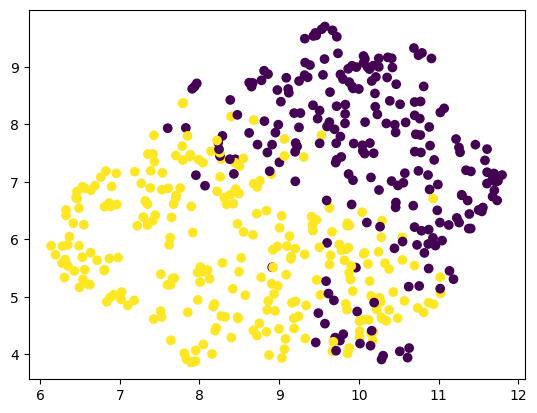

In [16]:
ZSCC.display_umap(logcounts, color=logcounts_zscc.read(topic='clusters').clusters)

In [17]:
len(logcounts_zscc.read(topic='clusters').clusters) - logcounts_zscc.read(topic='clusters').clusters.sum() # the number of elements in cluster 0

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet
Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


226

In [18]:
_logcounts = logcounts.copy()
_logcounts.columns = logcounts.columns.get_level_values(0)

In [19]:
logcontrols = mircohn.read('logcontrols')
_logcontrols = logcontrols.copy()
_logcontrols.columns = logcontrols.columns.get_level_values(0)

>>> miRCoHN: Reading topic 'logcontrols'


Read zscc cluster ordering from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/ordering/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/ordering.pkl


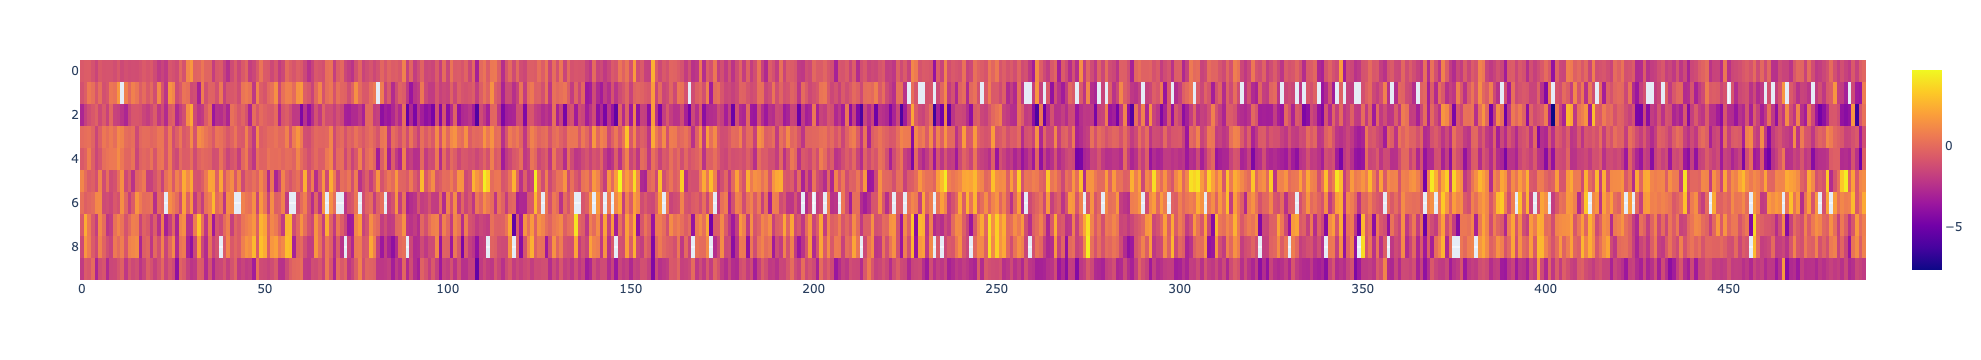

In [20]:
# discernible change left-to-right around column 226
miRCoHN.display_heatmap(_logcounts, seq_mad_threshold=0.99, center_at_controls=_logcontrols, seq_patterns=miRCoHN.DOWNREGULATED_SEQ_PATTERNS['epithelial'], ordering=logcounts_zscc.read(topic='ordering'), nseqs=10)

Read zscc cluster ordering from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/ordering/data_frame=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/ordering.pkl


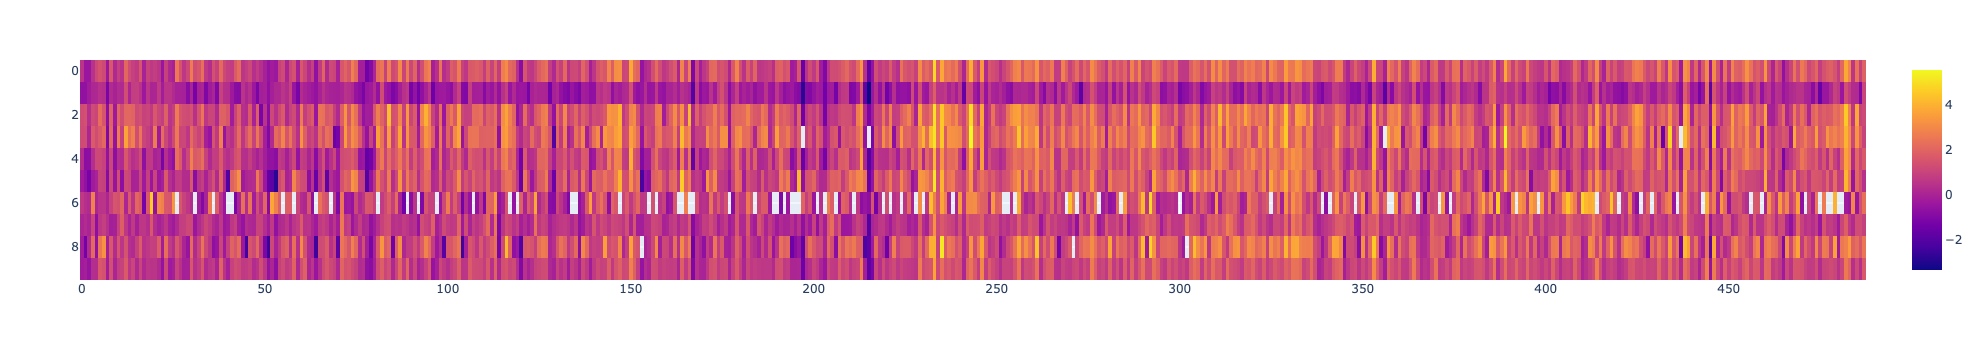

In [21]:
# maybe a change left-to-right around column 229
miRCoHN.display_heatmap(_logcounts, seq_mad_threshold=0.99, center_at_controls=_logcontrols, seq_patterns=miRCoHN.DOWNREGULATED_SEQ_PATTERNS['stromal'], nseqs=10, ordering=logcounts_zscc.read(topic='ordering'))

## seqs

In [22]:
mirna.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



{None: ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRNA/version=0.2.1')}

In [23]:
seqf = mirna.read()
seqf

ID  Accession  \
0     hsa-let-7a-1  MI0000060   
1     hsa-let-7a-2  MI0000061   
2     hsa-let-7a-3  MI0000062   
3       hsa-let-7b  MI0000063   
4       hsa-let-7c  MI0000064   
...            ...        ...   
1912  hsa-mir-9983  MI0033670   
1913  hsa-mir-9985  MI0032313   
1914  hsa-mir-9986  MI0032316   
1915   hsa-mir-99a  MI0000101   
1916   hsa-mir-99b  MI0000746   

                                               sequence  
0     UGGGAUGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCAC...  
1     AGGUUGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGA...  
2     GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...  
3     CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...  
4     GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...  
...                                                 ...  
1912  GGAAAUGUUCUAGCCAAAAAAGUUUGCCAAGAACCAUUGUGUCUUU...  
1913  CCCAUGUUCAUUGAGCUUUAUUCACAGUGGCUAAGCUAUGGAAUCC...  
1914  AAGAAGUAUUUUGCAAAAAGUGUGAGGUUGUCAUGCCUGCUAUUAC...  
1915  CCCAUUGGCAUAAACCCGUAGAUCCGAUCUUGUGGUGAAGUGGACC...  
1916  GGCACCCACCCGUAGAACCGACCUUGCGGGGCCUUCGCCGCACACA...  

[1917 rows x 3 columns]

## counts + seqs

In [24]:
mircoseqshn.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



>>> miRCoHN: Reading topic 'logcounts'
>>> miRCoHN: Reading topic 'logcontrols'
>>> miRCoSeqs: Topic logcounts data not built at path /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcounts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300/miRLogCos.parquet
>>> miRCoSeqs: Building miRCoSeqs ... 
>>> miRCoSeqs: Wrote counts to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/counts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300/miRCos.parquet
>>> miRCoSeqs: Wrote logcounts to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcounts/seqs=DBX.micron.datablocks.miRNA@

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



>>> miRCoSeqs: Wrote logcontrols to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcontrols/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300/miRLogCtrls.parquet
>>> miRCoSeqs: Generating samples using 1000 passes
>>> miRCoSeqs: pass 0
>>> miRCoSeqs: Generated 146400 in pass 0 for a total of 146400 so far
>>> miRCoSeqs: pass 1
>>> miRCoSeqs: Generated 146400 in pass 1 for a total of 292800 so far
>>> miRCoSeqs: pass 2
>>> miRCoSeqs: Generated 146400 in pass 2 for a total of 439200 so far
>>> miRCoSeqs: pass 3
>>> miRCoSeqs: Generated 146400 in pass 3 for a total of 585600 so far
>>> miRCoSeqs: pass 4
>>> miRCoSeqs: Generated 146400 in pass 4 for a total of 732000 so far
>>> miRCoSeqs: pass 5
>>> miRCoSeqs: Generated 146400 in pass 5 for a total of 878400 so far
>>> miRCoSeqs: pass 6
>>> m

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



>>> miRCoSeqs: Wrote 488 to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/rec_sample_ranges/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300/miRSampleRanges.parquet
>>> miRCoSeqs: ... done


/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



{'logcounts': ({'seqs': 'DBX.micron.datablocks.miRNA@0.2.1#mirna:',
   'logcounts': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts',
   'logcontrols': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols',
   'npasses': 1000,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcounts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1000/nseqs_per_record=300'),
 'counts': ({'seqs': 'DBX.micron.datablocks.miRNA@0.2.1#mirna:',
   'logcounts': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts',
   'logcontrols': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols',
   'npasses': 1000,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/counts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.m

### joint space: counts*seqs

#### jlogcounts

In [25]:
jlogcounts = mircoseqshn.read('logcounts')
jlogcounts.shape

(488, 229)

In [26]:
%%time
jlogcounts_zscc.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



>>> ZSCC: Topic zscc data not built at path /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/zscc.pkl
>>> ZSCC: Building ZSCC ...
>>> ZSCC: Fitting zscc to data of size 488


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: Future

Wrote zscc pickle to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/zscc.pkl
Assigning optimal clusters to data of len 488
>>> ZSCC: Wrote zscc clusters to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet
>>> ZSCC: Wrote zscc ordering to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/ordering/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/ordering.pkl
>>> ZSCC: ... done
CPU times: user 6min 27s, sys: 5min 33s, total: 12min
Wall time: 1min 1s


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



{'zscc': ({'data_frame': 'DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0'),
 'clusters': ({'data_frame': 'DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0'),
 'ordering': ({'data_frame': 'DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts',
   'clustering': 'sklearn.c

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



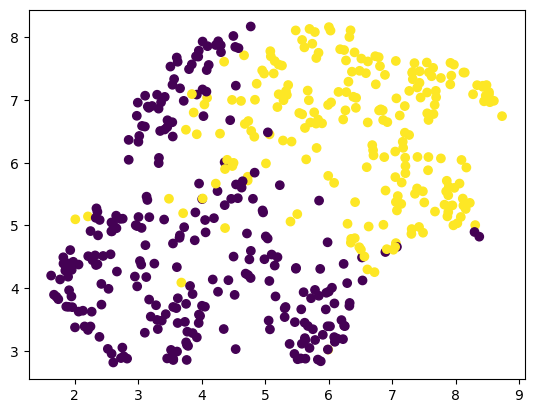

In [27]:
ZSCC.display_umap(jlogcounts, color=jlogcounts_zscc.read(topic='clusters').clusters)

In [28]:
jlogcounts_clusters_zscc = jlogcounts_zscc.read(topic='clusters')
display(len(jlogcounts_clusters_zscc) - jlogcounts_clusters_zscc.sum())
display(jlogcounts_clusters_zscc.sum())

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


clusters    267
dtype: int64

clusters    221
dtype: int64

In [29]:
jlogcounts_ordering_zscc = jlogcounts_zscc.read(topic='ordering')

Read zscc cluster ordering from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/ordering/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/ordering.pkl


In [30]:
#jlogcounts_ordering_zscc = np.argsort(jlogcounts_clusters_zscc)

In [31]:
_jlogcounts = mircoseqshn.read('logcounts')
_jlogcounts.columns = _jlogcounts.columns.get_level_values(0)

In [32]:
_jlogcontrols = mircoseqshn.read('logcontrols')
_jlogcontrols.columns = _jlogcontrols.columns.get_level_values(0)

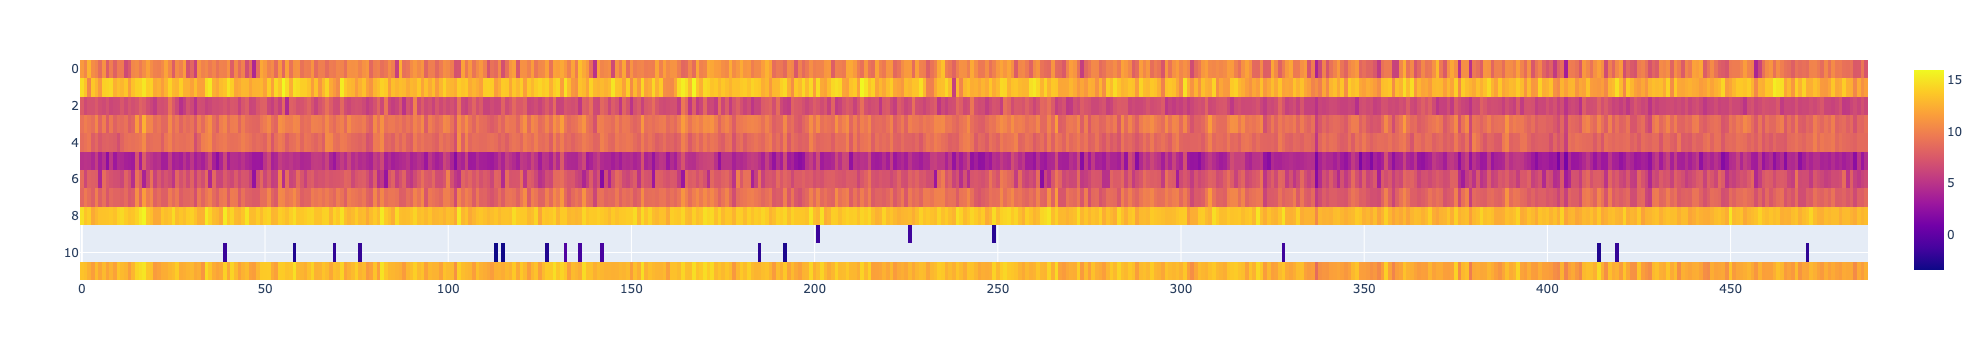

In [33]:
miRCoHN.display_heatmap(_jlogcounts, seq_mad_threshold=0.9, ordering=jlogcounts_ordering_zscc, seq_patterns=miRCoHN.DOWNREGULATED_SEQ_PATTERNS['stromal'],)

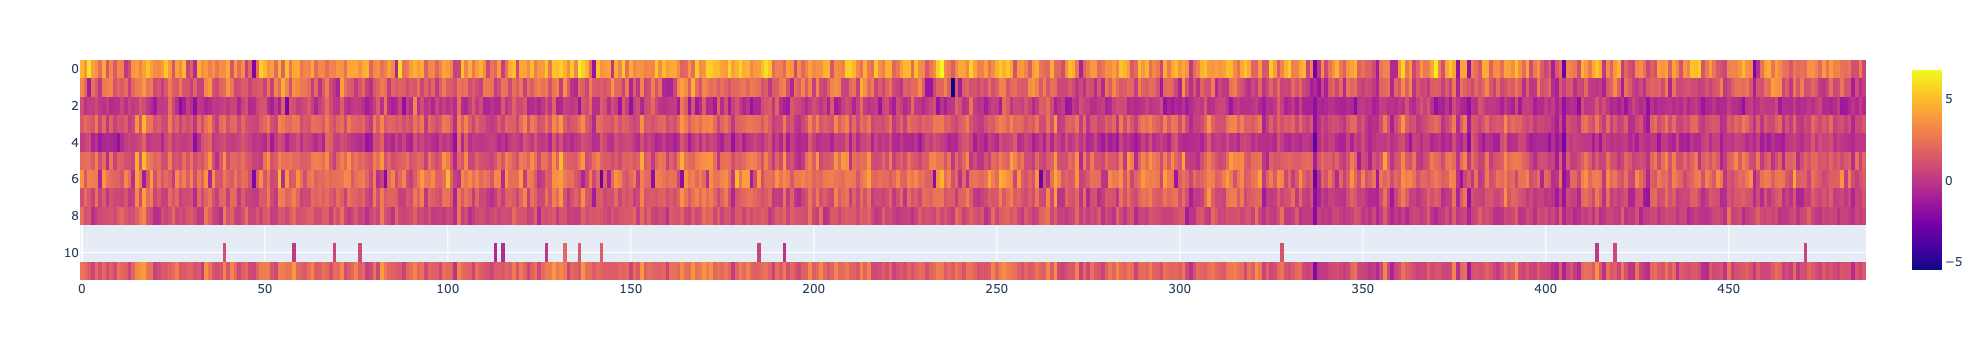

In [34]:
miRCoHN.display_heatmap(_jlogcounts, seq_mad_threshold=0.9, ordering=jlogcounts_ordering_zscc, center_at_controls=_jlogcontrols, seq_patterns=miRCoHN.DOWNREGULATED_SEQ_PATTERNS['stromal'],)

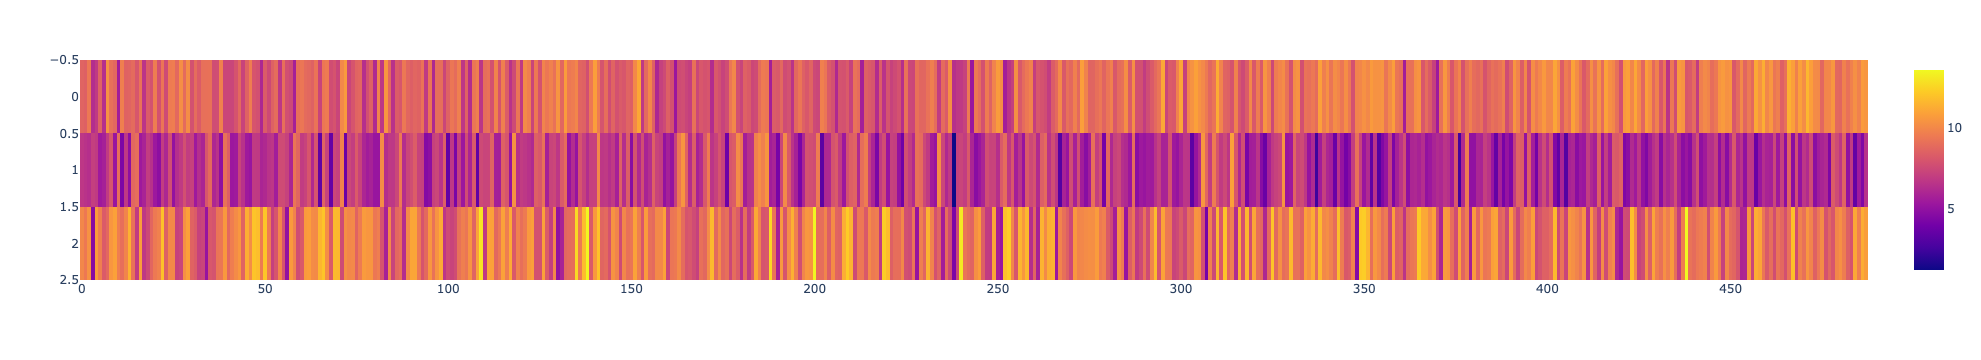

In [35]:
miRCoHN.display_heatmap(_jlogcounts, seq_mad_threshold=0.9, ordering=jlogcounts_ordering_zscc, seq_patterns=miRCoHN.DOWNREGULATED_SEQ_PATTERNS['epithelial'],)

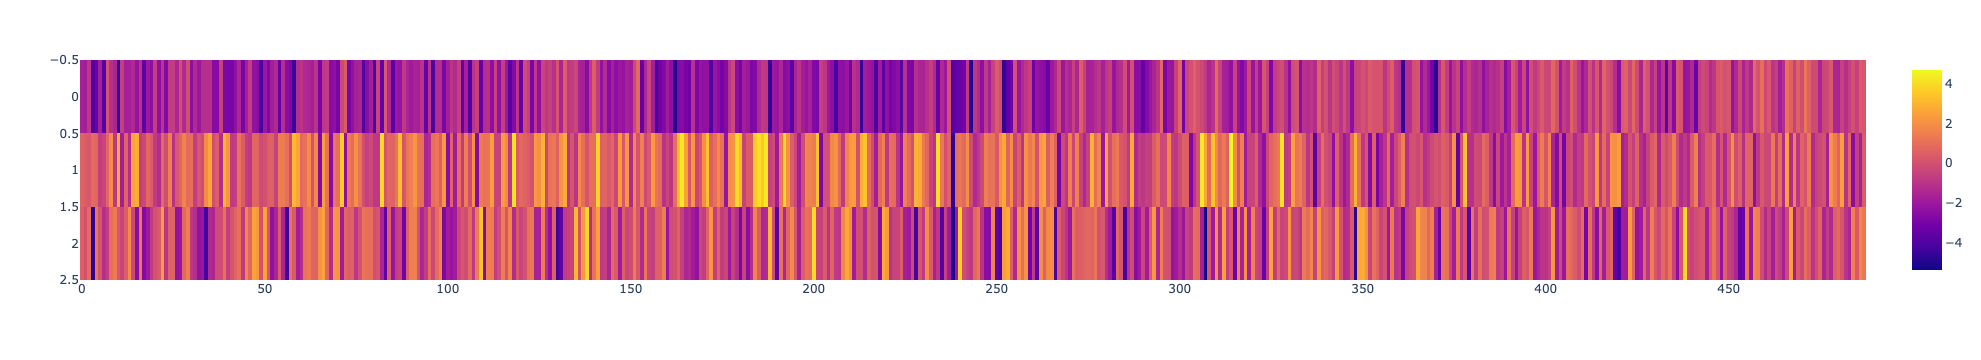

In [36]:
miRCoHN.display_heatmap(_jlogcounts, seq_mad_threshold=0.9, ordering=jlogcounts_ordering_zscc, center_at_controls=_jlogcontrols, seq_patterns=miRCoHN.DOWNREGULATED_SEQ_PATTERNS['epithelial'],)

#### jcounts

In [37]:
jcounts = mircoseqshn.read('counts')
jcounts.head(3)

hsa-let-7a-5p hsa-let-7b-5p hsa-let-7c-5p  \
                              MIMAT0000062  MIMAT0000063  MIMAT0000064   
TCGA-4P-AA8J-01A-11R-A39B-13  23248.041046   9018.179426    698.755424   
TCGA-BA-5149-01A-01R-1513-13  28924.253673   8307.141414    265.126057   
TCGA-BA-5152-01A-02R-1872-13  62939.458522  19571.857262    466.012533   

                             hsa-let-7d-5p hsa-let-7e-5p hsa-let-7f-5p  \
                              MIMAT0000065  MIMAT0000066  MIMAT0000067   
TCGA-4P-AA8J-01A-11R-A39B-13    218.164080   2552.053786   9327.884710   
TCGA-BA-5149-01A-01R-1513-13    392.480113    816.851897  18426.154735   
TCGA-BA-5152-01A-02R-1872-13    285.696127   1898.173084  32181.293262   

                             hsa-miR-15a-5p hsa-miR-142-5p hsa-miR-142-3p  \
                               MIMAT0000068   MIMAT0000433   MIMAT0000434   
TCGA-4P-AA8J-01A-11R-A39B-13     154.304492      87.567115    1742.845943   
TCGA-BA-5149-01A-01R-1513-13     173.065445     165.411446    2589.815969   
TCGA-BA-5152-01A-02R-1872-13     197.043346     228.155456    4809.329619   

                             hsa-miR-145-5p  ... hsa-miR-204-5p  \
                               MIMAT0000437  ...   MIMAT0000265   
TCGA-4P-AA8J-01A-11R-A39B-13    1299.802939  ...       2.329641   
TCGA-BA-5149-01A-01R-1513-13    1189.133954  ...       0.850444   
TCGA-BA-5152-01A-02R-1872-13     379.366986  ...       1.672695   

                             hsa-miR-3606-3p hsa-miR-93-5p hsa-miR-95-3p  \
                                MIMAT0022965  MIMAT0000093  MIMAT0000094   
TCGA-4P-AA8J-01A-11R-A39B-13             NaN   3699.196684     20.281586   
TCGA-BA-5149-01A-01R-1513-13             NaN   6940.689790      1.913500   
TCGA-BA-5152-01A-02R-1872-13             NaN   4293.805345     18.065095   

                             hsa-miR-96-5p hsa-miR-99a-5p hsa-miR-100-5p  \
                              MIMAT0000095   MIMAT0000097   MIMAT0000098   
TCGA-4P-AA8J-01A-11R-A39B-13      8.085227     215.834437    3195.445963   
TCGA-BA-5149-01A-01R-1513-13     45.498778      33.379944     848.530951   
TCGA-BA-5152-01A-02R-1872-13     22.079560      26.094025     654.692409   

                             hsa-miR-8056 hsa-miR-29b-3p hsa-miR-103a-3p  
                             MIMAT0030983   MIMAT0000100    MIMAT0000101  
TCGA-4P-AA8J-01A-11R-A39B-13          NaN     801.396688    17405.848223  
TCGA-BA-5149-01A-01R-1513-13          NaN     537.906114    42594.723033  
TCGA-BA-5152-01A-02R-1872-13          NaN     503.480879    29353.771422  

[3 rows x 229 columns]

In [38]:
%%time
jcounts_zscc.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



>>> ZSCC: Topic zscc data not built at path /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/zscc.pkl
>>> ZSCC: Building ZSCC ...
>>> ZSCC: Fitting zscc to data of size 488


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: Future

Wrote zscc pickle to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/zscc.pkl
Assigning optimal clusters to data of len 488
>>> ZSCC: Wrote zscc clusters to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet
>>> ZSCC: Wrote zscc ordering to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/ordering/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/ordering.pkl
>>> ZSCC: ... done
CPU times: user 6min 25s, sys: 5min 30s, total: 11min 55s
Wall time: 1min 1s


/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



{'zscc': ({'data_frame': 'DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/zscc/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0'),
 'clusters': ({'data_frame': 'DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0'),
 'ordering': ({'data_frame': 'DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts',
   'clustering': 'sklearn.cluster.KMeans',

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


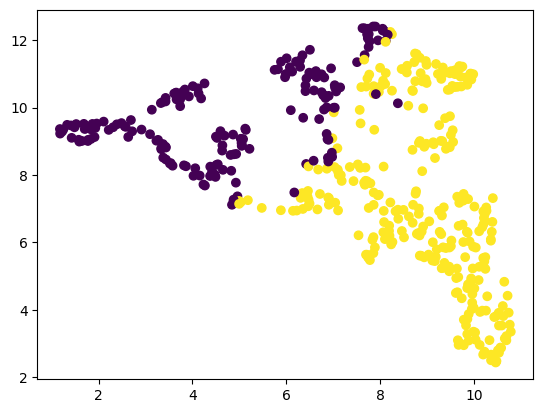

In [39]:
ZSCC.display_umap(jcounts, color=jcounts_zscc.read('clusters').clusters)

In [40]:
jcounts_clusters_zscc = jcounts_zscc.read(topic='clusters')
display(len(jcounts_clusters_zscc) - jcounts_clusters_zscc.sum())
display(jcounts_clusters_zscc.sum())

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


clusters    183
dtype: int64

clusters    305
dtype: int64

In [41]:
jcounts_ordering_zscc = jcounts_zscc.read(topic='ordering')

Read zscc cluster ordering from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/ordering/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/ordering.pkl


In [42]:
_jcounts = mircoseqshn.read('counts')
_jcounts.columns = _jcounts.columns.get_level_values(0)

In [43]:
_jcontrols = miRCoSeqs.expcounts(_jlogcontrols)

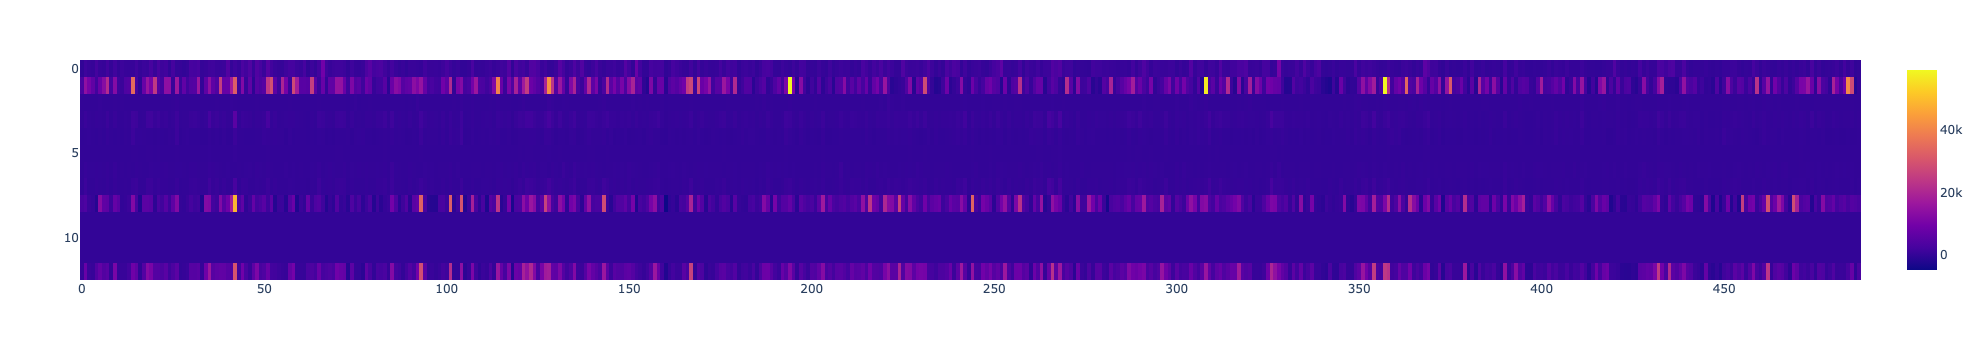

In [44]:
miRCoHN.display_heatmap(_jcounts.fillna(0.0), seq_mad_threshold=0.99, ordering=jcounts_ordering_zscc, center_at_controls=_jcontrols.fillna(0.0), seq_patterns=miRCoHN.DOWNREGULATED_SEQ_PATTERNS['stromal'],)

In [45]:
_nlogjcounts = miRCoHN.center_at_controls(_jlogcounts, _jlogcontrols)
_nlogjcounts

hsa-let-7a-2-3p  hsa-let-7a-3p  hsa-let-7a-5p  \
TCGA-4P-AA8J-01A-11R-A39B-13              NaN            NaN      -0.790238   
TCGA-BA-5149-01A-01R-1513-13              NaN            NaN      -0.475067   
TCGA-BA-5152-01A-02R-1872-13              NaN            NaN       0.646618   
TCGA-BA-5555-01A-01R-1513-13              NaN            NaN       0.507840   
TCGA-BA-5556-01A-01R-1513-13              NaN            NaN       0.368630   
...                                       ...            ...            ...   
TCGA-UF-A7JS-01A-11R-A34O-13              NaN            NaN      -1.443927   
TCGA-UF-A7JT-01A-11R-A34O-13              NaN            NaN      -0.836143   
TCGA-UF-A7JV-01A-11R-A34O-13              NaN            NaN      -1.298256   
TCGA-UP-A6WW-01A-12R-A34O-13              NaN            NaN      -0.312331   
TCGA-WA-A7H4-01A-21R-A34O-13              NaN            NaN      -1.266010   

                              hsa-let-7b-3p  hsa-let-7b-5p  hsa-let-7c-3p  \
TCGA-4P-AA8J-01A-11R-A39B-13            NaN      -1.034377            NaN   
TCGA-BA-5149-01A-01R-1513-13            NaN      -1.152861            NaN   
TCGA-BA-5152-01A-02R-1872-13            NaN       0.083496            NaN   
TCGA-BA-5555-01A-01R-1513-13            NaN       0.714155            NaN   
TCGA-BA-5556-01A-01R-1513-13            NaN       0.315908            NaN   
...                                     ...            ...            ...   
TCGA-UF-A7JS-01A-11R-A34O-13            NaN      -0.879282            NaN   
TCGA-UF-A7JT-01A-11R-A34O-13            NaN       0.169562            NaN   
TCGA-UF-A7JV-01A-11R-A34O-13            NaN      -0.945508            NaN   
TCGA-UP-A6WW-01A-12R-A34O-13            NaN       0.731223            NaN   
TCGA-WA-A7H4-01A-21R-A34O-13            NaN      -0.527081            NaN   

                              hsa-let-7c-5p  hsa-let-7d-3p  hsa-let-7d-5p  \
TCGA-4P-AA8J-01A-11R-A39B-13      -2.977490            NaN       0.633525   
TCGA-BA-5149-01A-01R-1513-13      -4.375599            NaN       1.480731   
TCGA-BA-5152-01A-02R-1872-13      -3.561908            NaN       1.022593   
TCGA-BA-5555-01A-01R-1513-13      -0.881762            NaN       1.097330   
TCGA-BA-5556-01A-01R-1513-13      -3.033945            NaN       1.249818   
...                                     ...            ...            ...   
TCGA-UF-A7JS-01A-11R-A34O-13      -3.693155            NaN       1.648498   
TCGA-UF-A7JT-01A-11R-A34O-13      -0.873490            NaN       0.543915   
TCGA-UF-A7JV-01A-11R-A34O-13      -2.753655            NaN       1.029732   
TCGA-UP-A6WW-01A-12R-A34O-13      -0.761050            NaN       0.832091   
TCGA-WA-A7H4-01A-21R-A34O-13      -1.943202            NaN       0.009224   

                              hsa-let-7e-3p  ...  hsa-miR-95-5p  hsa-miR-9500  \
TCGA-4P-AA8J-01A-11R-A39B-13            NaN  ...            NaN           NaN   
TCGA-BA-5149-01A-01R-1513-13            NaN  ...            NaN           NaN   
TCGA-BA-5152-01A-02R-1872-13            NaN  ...            NaN           NaN   
TCGA-BA-5555-01A-01R-1513-13            NaN  ...            NaN           NaN   
TCGA-BA-5556-01A-01R-1513-13            NaN  ...            NaN           NaN   
...                                     ...  ...            ...           ...   
TCGA-UF-A7JS-01A-11R-A34O-13            NaN  ...            NaN           NaN   
TCGA-UF-A7JT-01A-11R-A34O-13            NaN  ...            NaN           NaN   
TCGA-UF-A7JV-01A-11R-A34O-13            NaN  ...            NaN           NaN   
TCGA-UP-A6WW-01A-12R-A34O-13            NaN  ...            NaN           NaN   
TCGA-WA-A7H4-01A-21R-A34O-13            NaN  ...            NaN           NaN   

                              hsa-miR-96-3p  hsa-miR-96-5p  hsa-miR-98-3p  \
TCGA-4P-AA8J-01A-11R-A39B-13            NaN       0.460405            NaN   
TCGA-BA-5149-01A-01R-1513-13            NaN       2.952873            NaN   
TCGA-BA-5152-01A-02R-1872-1

In [46]:
_njcounts = miRCoSeqs.expcounts(_nlogjcounts).replace(1.0, 0.0)

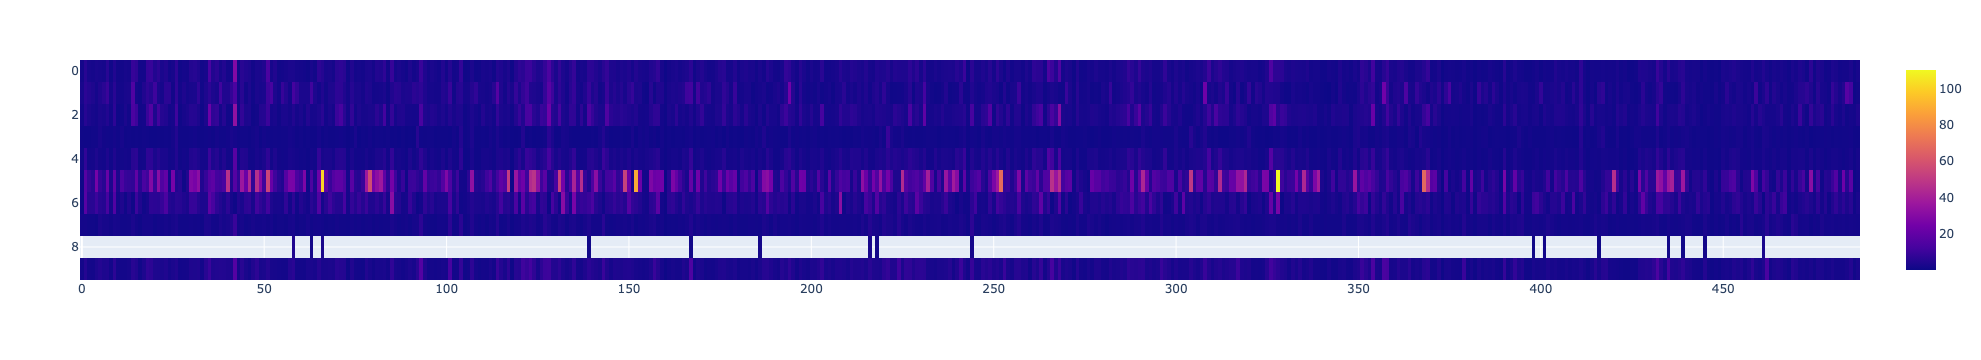

In [47]:
miRCoHN.display_heatmap(_njcounts, seq_mad_threshold=0.99, ordering=jcounts_ordering_zscc, seq_patterns=miRCoHN.DOWNREGULATED_SEQ_PATTERNS['stromal'],)

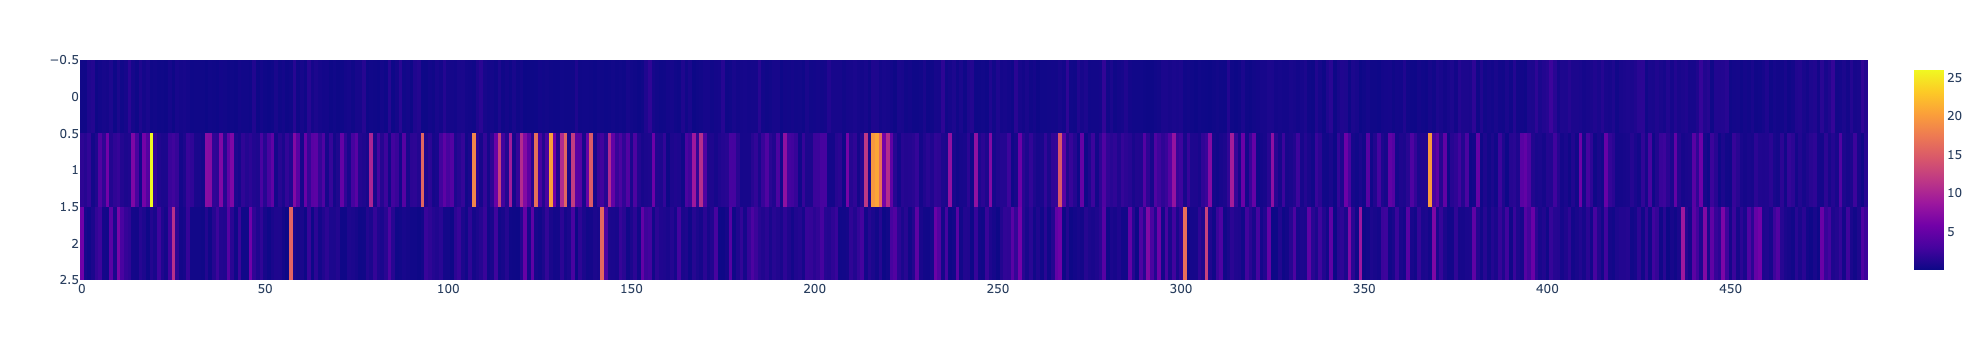

In [48]:
miRCoHN.display_heatmap(_njcounts, seq_mad_threshold=0.99, ordering=jcounts_ordering_zscc, seq_patterns=miRCoHN.DOWNREGULATED_SEQ_PATTERNS['epithelial'],)

#### jseqs

In [49]:
jseqs = mircoseqshn.read('seqs')
jseqs

ID  Accession  \
hsa-let-7a-5p   MIMAT0000062  hsa-let-7a-3  MI0000062   
hsa-let-7b-5p   MIMAT0000063    hsa-let-7b  MI0000063   
hsa-let-7c-5p   MIMAT0000064    hsa-let-7c  MI0000064   
hsa-let-7d-5p   MIMAT0000065    hsa-let-7d  MI0000065   
hsa-let-7e-5p   MIMAT0000066    hsa-let-7e  MI0000066   
...                                    ...        ...   
hsa-miR-99a-5p  MIMAT0000097    hsa-mir-95  MI0000097   
hsa-miR-100-5p  MIMAT0000098    hsa-mir-96  MI0000098   
hsa-miR-8056    MIMAT0030983  hsa-mir-9718  MI0030983   
hsa-miR-29b-3p  MIMAT0000100    hsa-mir-98  MI0000100   
hsa-miR-103a-3p MIMAT0000101   hsa-mir-99a  MI0000101   

                                                                       sequence  
hsa-let-7a-5p   MIMAT0000062  GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...  
hsa-let-7b-5p   MIMAT0000063  CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...  
hsa-let-7c-5p   MIMAT0000064  GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...  
hsa-let-7d-5p   MIMAT0000065  CCUAGGAAGAGGUAGUAGGUUGCAUAGUUUUAGGGCAGGGAUUUUG...  
hsa-let-7e-5p   MIMAT0000066  CCCGGGCUGAGGUAGGAGGUUGUAUAGUUGAGGAGGACACCCAAGG...  
...                                                                         ...  
hsa-miR-99a-5p  MIMAT0000097  AACACAGUGGGCACUCAAUAAAUGUCUGUUGAAUUGAAAUGCGUUA...  
hsa-miR-100-5p  MIMAT0000098  UGGCCGAUUUUGGCACUAGCACAUUUUUGCUUGUGUCUCUCCGCUC...  
hsa-miR-8056    MIMAT0030983  GCCCGGUCUCUUUGCCUCCGGUUCUUAAACCAGUUGCUGACCUGGG...  
hsa-miR-29b-3p  MIMAT0000100  AGGAUUCUGCUCAUGCCAGGGUGAGGUAGUAAGUUGUAUUGUUGUG...  
hsa-miR-103a-3p MIMAT0000101  CCCAUUGGCAUAAACCCGUAGAUCCGAUCUUGUGGUGAAGUGGACC...  

[229 rows x 3 columns]

## jseqs: sampled by jcounts

### fasttext

In [50]:
mircoseqscbow.clone(verbose=True).build()

DBX: scope: databuilder datablocks.datablock.DBX('micron.datablocks.FastText', 'microseqscbow').databuilder with version 0.6.1 with alias 'microseqscbow': using specified scope: {'samples_path': datablocks.datablock.DBX.Pather(dbx=datablocks.datablock.DBX('micron.datablocks.miRCoSeqs', 'mircoseqshn_1000_300'), version='1.2.0', topic='samples'), 'model': 'cbow', 'dim': 100, 'context_window_size': 300}
Failed to retrieve scope from build record, ignoring scope of record.
build_databook_request: requesting build of shortfall batchscopes with tags: [{'samples_path': datablocks.datablock.DBX.Pather(dbx=datablocks.datablock.DBX('micron.datablocks.miRCoSeqs', 'mircoseqshn_1000_300'), version='1.2.0', topic='samples'), 'model': 'cbow', 'dim': 100, 'context_window_size': 300}]
build_databook_request: shortfall_batch_requests: [datablocks.eval.pool.Logging.Request(datablocks.eval.pool.Logging('Logging', dataspace=datablocks.dataspace.Dataspace('/Users/dkarpeyev/.cache/datalake', storage_options=

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

Read 292M words
Number of words:  116
Number of labels: 0
Progress: 100.0% words/sec/thread: 3064393 lr:  0.000000 avg.loss:  1.263016 ETA:   0h 0m 0s

DATABOOK LIFECYCLE: END: writing record for request:
datablocks.eval.request.AND(datablocks.eval.request.Task(datablocks.datablock.DBX('micron.datablocks.FastText', 'microseqscbow').databuilder.__build_batch__)({'samples_path': '[DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:samples]', 'model': 'cbow', 'dim': 100, 'context_window_size': 300}, samples_path=datablocks.datablock.DBX.Pather(dbx=datablocks.datablock.DBX('micron.datablocks.miRCoSeqs', 'mircoseqshn_1000_300'), version='1.2.0', topic='samples'), model='cbow', dim=100, context_window_size=300).apply(datablocks.eval.pool.Logging(Logging, dataspace=datablocks.dataspace.Dataspace('/Users/dkarpeyev/.cache/datalake'))), datablocks.eval.request.Task(datablocks.datablock.DBX('micron.datablocks.FastText', 'microseqscbow').databuilder.extent), samples_path='[DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:samples]', model='cbow', dim=100, context_window_size=300)
DATABOOK LIFECYCLE: END: topics: [None]
DATABOOK L

0s


{None: ({'samples_path': '[DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:samples]',
   'model': 'cbow',
   'dim': 100,
   'context_window_size': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/FastText/version=0.6.1/samples_path=[DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:samples]/model=cbow/dim=100/context_window_size=300')}

In [51]:
cbow = mircoseqscbow.read()

In [55]:
mircoseqshn0.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



>>> miRCoHN: Reading topic 'logcounts'
>>> miRCoHN: Reading topic 'logcontrols'
>>> miRCoSeqs: Topic logcounts data not built at path /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcounts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300/miRLogCos.parquet
>>> miRCoSeqs: Building miRCoSeqs ... 
>>> miRCoSeqs: Wrote counts to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/counts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300/miRCos.parquet
>>> miRCoSeqs: Wrote logcounts to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcounts/seqs=DBX.micron.datablocks.miRNA@0.2.1#

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



>>> miRCoSeqs: Wrote logcontrols to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcontrols/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300/miRLogCtrls.parquet
>>> miRCoSeqs: Generating samples using 1 passes
>>> miRCoSeqs: pass 0
>>> miRCoSeqs: Generated 146400 in pass 0 for a total of 146400 so far
>>> miRCoSeqs: Generated 146400 samples
>>> miRCoSeqs: Writing 146400 samples to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/samples/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300/miRCoSeqs.txt
>>> miRCoSeqs: Wrote 488 to /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



{'logcounts': ({'seqs': 'DBX.micron.datablocks.miRNA@0.2.1#mirna:',
   'logcounts': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts',
   'logcontrols': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols',
   'npasses': 1,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/logcounts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts/logcontrols=DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols/npasses=1/nseqs_per_record=300'),
 'counts': ({'seqs': 'DBX.micron.datablocks.miRNA@0.2.1#mirna:',
   'logcounts': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcounts',
   'logcontrols': 'DBX.micron.datablocks.miRCoHN@0.10.3#mirco_hn:logcontrols',
   'npasses': 1,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/miRCoSeqs/version=1.2.0/counts/seqs=DBX.micron.datablocks.miRNA@0.2.1#mirna:/logcounts=DBX.micron.dat

In [56]:
samples0 = mircoseqshn0.read('samples')
display(samples0[:10])
rec_samples_ranges0 = mircoseqshn0.read('rec_sample_ranges')
rec_samples_ranges0

>>> miRCoSeqs: Read 146401 useqs


['GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU']

pass                                         0
TCGA-4P-AA8J-01A-11R-A39B-13          [0, 300]
TCGA-BA-5149-01A-01R-1513-13        [300, 600]
TCGA-BA-5152-01A-02R-1872-13        [600, 900]
TCGA-BA-5555-01A-01R-1513-13       [900, 1200]
TCGA-BA-5556-01A-01R-1513-13      [1200, 1500]
...                                        ...
TCGA-UF-A7JS-01A-11R-A34O-13  [144900, 145200]
TCGA-UF-A7JT-01A-11R-A34O-13  [145200, 145500]
TCGA-UF-A7JV-01A-11R-A34O-13  [145500, 145800]
TCGA-UP-A6WW-01A-12R-A34O-13  [145800, 146100]
TCGA-WA-A7H4-01A-21R-A34O-13  [146100, 146400]

[488 rows x 1 columns]

* cbow: display

In [57]:
cbowsamples0_ = np.array([[cbow[sample] for sample in samples0[r[0]:r[1]]] for r in rec_samples_ranges0.iloc[:, 0]])
shape0_ = cbowsamples0_.shape
cbowsamples0 = cbowsamples0_.reshape(shape0_[0], shape0_[-2]*shape0_[-1])
cbowsamples0.shape

(488, 30000)

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datablocks/ZSCC/version=0.6.1/clusters/data_frame=DBX.micron.datablocks.miRCoSeqs@1.2.0#mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



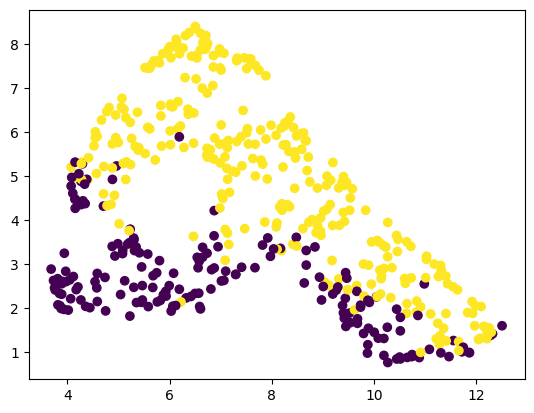

In [58]:
FastText.display_umap(pd.DataFrame(cbowsamples0), color=jcounts_zscc.read('clusters').clusters)